In [1]:
import pickle as pkl
from fragments.params import ParamStorage
from fragments.strategy import ConditionalStrategy
from fragments.indicators import RSI
from fragments.optim import optimize
from fragments.stats import total_profit, plot

%matplotlib inline

In [2]:
param_storage = ParamStorage()

strategies = list()
strategies.append(ConditionalStrategy(RSI(param_storage), param_storage))
strategies.append(
    ConditionalStrategy(RSI(param_storage), param_storage, strategies[0])
)

with open("../data/GOOG.pkl", "rb") as f:
    ohlcv_list = pkl.load(f)

results = optimize(strategies[-1], total_profit, ohlcv_list, 42)

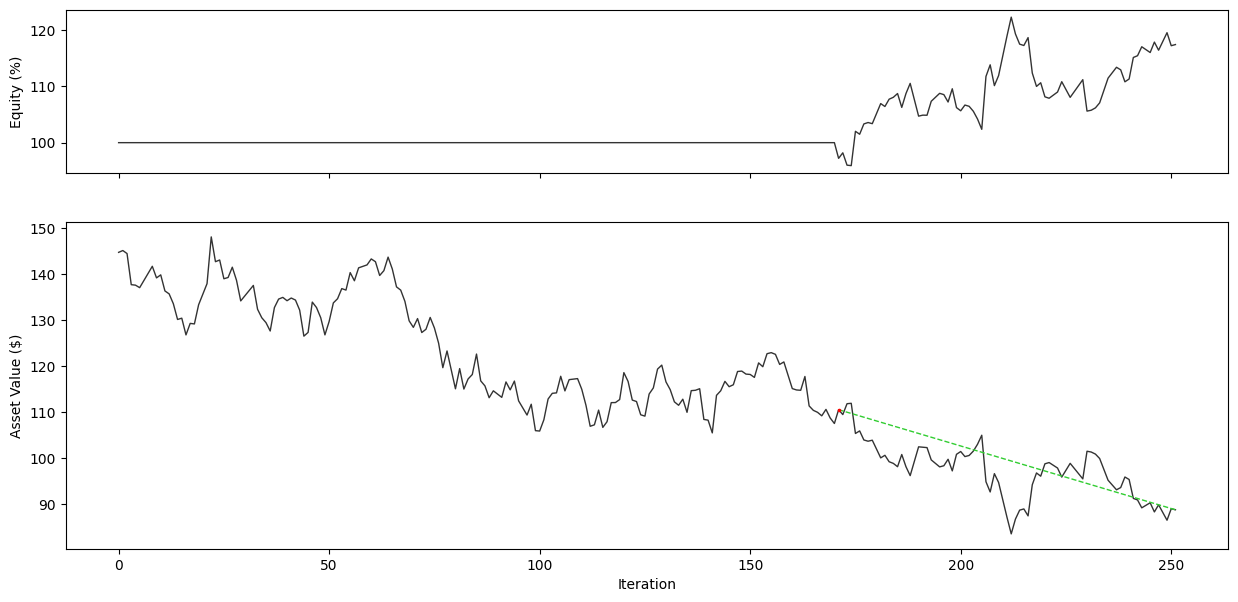

In [96]:
plot(strategies[-1], ohlcv_list)